## **Step_1: Creation of train_set & test_set**

In [1]:
import os
import shutil
from random import shuffle

In [7]:
BASE_DIR = '../input/basicshapes/shapes/shapes'
shapes= os.listdir(BASE_DIR)
shapes

['circles', 'triangles', 'squares']

In [3]:
#Create the paths of train set and test set
TRAIN_DIR = './train_set'
TEST_DIR = './test_set'

In [8]:
#Create a dictionary with the file names for each directory "shape" (under "shapes" directory)
shapes_dict = {shape:os.listdir(os.path.join(BASE_DIR,shape))for shape in shapes}


In [9]:
#Shuffle the filenames for each shape
for item in shapes_dict:
  shuffle(shapes_dict[item])

In [10]:
if os.path.exists(TRAIN_DIR):
    print("pass")
else:
    for shape, list_filenames in shapes_dict.items():
        os.makedirs(os.path.join(TRAIN_DIR,shape))
        os.makedirs(os.path.join(TEST_DIR, shape))
        for item in list_filenames[:80]:
            shutil.copy(os.path.join(BASE_DIR,shape,item), os.path.join(TRAIN_DIR,shape,item))
        for item in list_filenames[80:]:
            shutil.copy(os.path.join(BASE_DIR,shape,item), os.path.join(TEST_DIR,shape,item))
    

pass


In [11]:
#Verification 
for shape in shapes:
  print("The number of imagefiles in the original sub directory of {} is: {}".format(shape,len(os.listdir(os.path.join(BASE_DIR,shape)))))
  print("The number of imagefiles in the sub train set of {} is: {}".format(shape, len(os.listdir(os.path.join(TRAIN_DIR,shape)))))
  print("The number of imagefiles in the sub test set of {} is: {}".format(shape, len(os.listdir(os.path.join(TEST_DIR,shape)))))
  print("*******************************************************************")

The number of imagefiles in the original sub directory of circles is: 100
The number of imagefiles in the sub train set of circles is: 80
The number of imagefiles in the sub test set of circles is: 20
*******************************************************************
The number of imagefiles in the original sub directory of triangles is: 100
The number of imagefiles in the sub train set of triangles is: 80
The number of imagefiles in the sub test set of triangles is: 20
*******************************************************************
The number of imagefiles in the original sub directory of squares is: 100
The number of imagefiles in the sub train set of squares is: 80
The number of imagefiles in the sub test set of squares is: 20
*******************************************************************


## **Step_2: Data Exploration**

In [12]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd

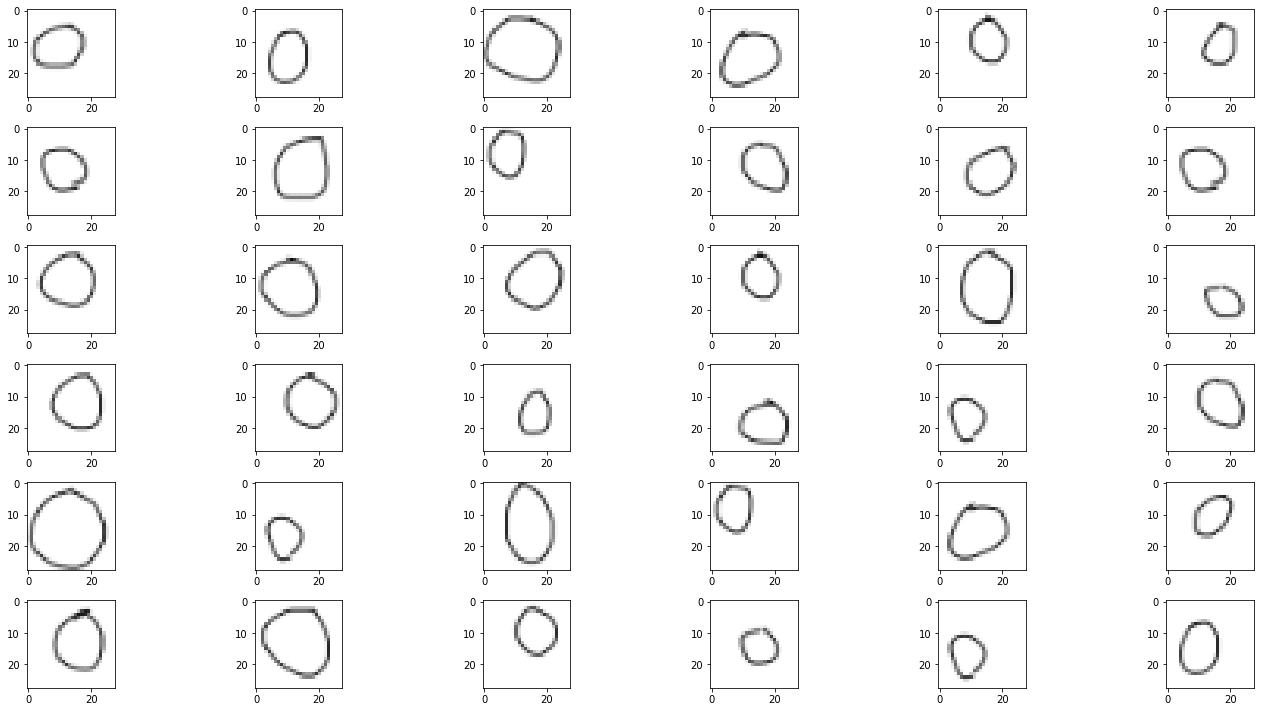

In [13]:
# Visualization of some images from trai_set(Circles)
images_circles = os.listdir(os.path.join(TRAIN_DIR,'circles'))
random_circles = [np.random.choice(images_circles) for i in range(36)]
%matplotlib inline
plt.figure(figsize=(20,10))

for i in range(36):
  plt.subplot(6,6,i+1)
  img= imread(os.path.join(TRAIN_DIR,'circles',random_circles[i]))
  plt.imshow(img)
plt.tight_layout()

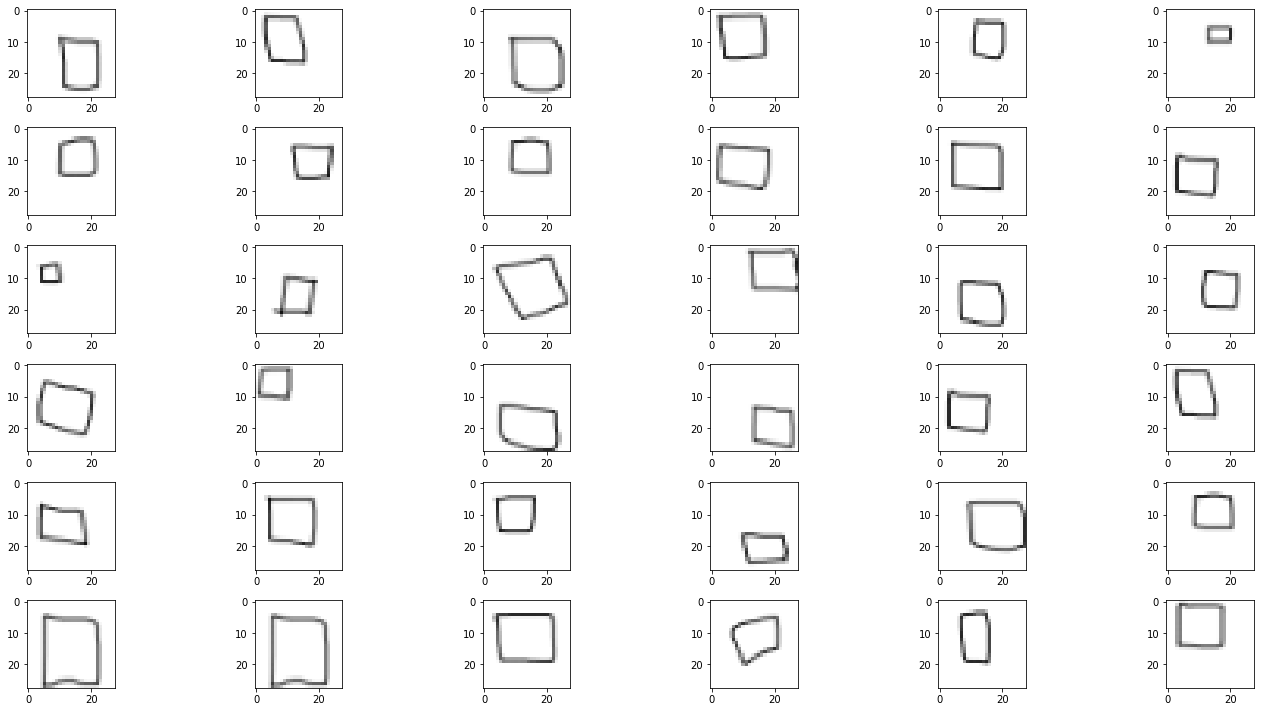

In [14]:
#Visualization of some images from train set (Squares)
images_squares = os.listdir(os.path.join(TRAIN_DIR,'squares'))
random_squares = [np.random.choice(images_squares)for i in range(36)]
plt.figure(figsize=(20,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  img= imread(os.path.join(TRAIN_DIR,'squares',random_squares[i]))
  plt.imshow(img)
plt.tight_layout()

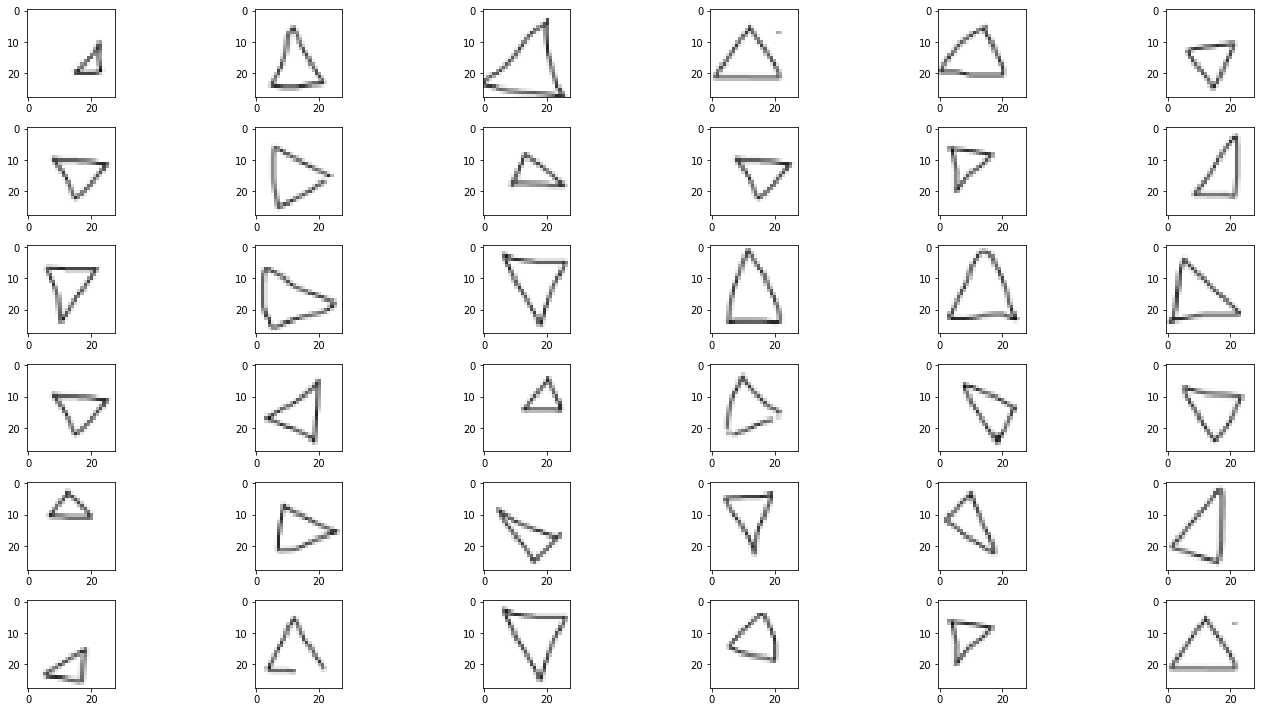

In [15]:
#Visualization of some images from train set (triangles)
images_triangles = os.listdir(os.path.join(TRAIN_DIR,'triangles'))
random_triangles = [np.random.choice(images_triangles)for i in range(36)]
plt.figure(figsize=(20,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  img= imread(os.path.join(TRAIN_DIR,'triangles',random_triangles[i]))
  plt.imshow(img)
plt.tight_layout()

In [16]:
#Checking the shape

img_c_shapes1=[]
img_c_shapes2=[]
for image in (images_circles):
  img= imread(os.path.join(TRAIN_DIR, 'circles', image))
  shape1= img.shape[0]
  shape2= img.shape[1]
  img_c_shapes1.append(shape1)
  img_c_shapes2.append(shape2)
print((int(np.mean(img_c_shapes1)), int(np.mean(img_c_shapes2))))

img_s_shapes1=[]
img_s_shapes2=[]
for image in (images_squares):
  img= imread(os.path.join(TRAIN_DIR, 'squares', image))
  shape1= img.shape[0]
  shape2= img.shape[1]
  img_s_shapes1.append(shape1)
  img_s_shapes2.append(shape2)
print((int(np.mean(img_s_shapes1)), int(np.mean(img_s_shapes2))))

img_t_shapes1=[]
img_t_shapes2=[]
for image in (images_triangles):
  img= imread(os.path.join(TRAIN_DIR,'triangles', image))
  shape1= img.shape[0]
  shape2= img.shape[1]
  img_t_shapes1.append(shape1)
  img_t_shapes2.append(shape2)
print((int(np.mean(img_t_shapes1)), int(np.mean(img_t_shapes2))))


(28, 28)
(28, 28)
(28, 28)


In [19]:
#Checking the number of channels

image= imread(os.path.join(TRAIN_DIR, 'circles', random_circles[2]))
image.shape


(28, 28, 3)

In [20]:
#Checking the pixels values
from keras.preprocessing import image
img_path= os.path.join(TRAIN_DIR, 'circles',random_circles[2])
img_gen= image.load_img(img_path)
img_tensor= image.img_to_array(img_gen)
img_tensor

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

## **Step_3: Buiding & training the model**

In [21]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Dropout,Flatten
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow as tf


In [53]:
# Model initialization
model= Sequential()

# 1st Convolution
model.add(Conv2D(filters= 32, kernel_size=(3,3), input_shape=(28,28,3), activation=tf.nn.leaky_relu))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolution
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation=tf.nn.leaky_relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))


#Flatten
model.add(Flatten())

#Add fully connected layers
model.add(Dense(units=512,activation = tf.nn.leaky_relu))
model.add(Dropout(rate=0.5))
model.add(Dense(units=256, activation= tf.nn.leaky_relu))
model.add(Dropout(rate=0.5))
#Add output layer

model.add(Dense(units=3, activation="softmax"))


In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)              

In [55]:
# compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics= ["accuracy"])

In [56]:
#Create the generators so that the model could read the images from the directories

train_datagen= ImageDataGenerator(rescale= 1/.255)
test_datagen= ImageDataGenerator(rescale= 1/.255)

train_set= train_datagen.flow_from_directory(TRAIN_DIR,
                                            batch_size=32,
                                            target_size=(28,28),
                                            class_mode= 'categorical')
test_set = test_datagen.flow_from_directory(TEST_DIR,
                                           batch_size=8,
                                           target_size= (28,28),
                                           class_mode= 'categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [57]:
#Using the callback ModelCheckpoint to store the best weights 
checkpointer= ModelCheckpoint(filepath= "./best_weights.hdf5",
                             verbose=1,
                             monitor="val_accuracy",
                             save_best_only= True)


In [58]:
history= model.fit(train_set,
                   epochs=100,
                   batch_size= 40,
                   validation_data= test_set,
                   validation_batch_size=10,
                   callbacks=[checkpointer])

Epoch 1/100
8/8 [==============================] - 1s 54ms/step - loss: 379.3982 - accuracy: 0.3852 - val_loss: 53.2815 - val_accuracy: 0.3333

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to ./best_weights.hdf5
Epoch 2/100
8/8 [==============================] - 0s 31ms/step - loss: 103.4810 - accuracy: 0.3368 - val_loss: 37.7718 - val_accuracy: 0.3333

Epoch 00002: val_accuracy did not improve from 0.33333
Epoch 3/100
8/8 [==============================] - 0s 31ms/step - loss: 80.3497 - accuracy: 0.3695 - val_loss: 13.7702 - val_accuracy: 0.4167

Epoch 00003: val_accuracy improved from 0.33333 to 0.41667, saving model to ./best_weights.hdf5
Epoch 4/100
8/8 [==============================] - 0s 31ms/step - loss: 55.5324 - accuracy: 0.4213 - val_loss: 8.7836 - val_accuracy: 0.4500

Epoch 00004: val_accuracy improved from 0.41667 to 0.45000, saving model to ./best_weights.hdf5
Epoch 5/100
8/8 [==============================] - 0s 31ms/step - loss: 27.7571 - accur

In [59]:
df= pd.DataFrame(history.history)
df_loss= df[["loss","val_loss"]]
df_accuracy= df[["accuracy","val_accuracy"]]

<AxesSubplot:>

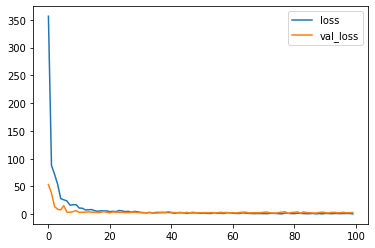

In [60]:
df_loss.plot()

<AxesSubplot:>

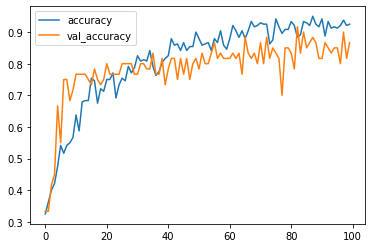

In [61]:
df_accuracy.plot()

In [62]:
#Charging the model with the best weights
model.load_weights('./best_weights.hdf5')

#store the best model for later use 
model.save('./model_shapes_cnn.h5')

In [75]:
results = model.evaluate(test_set, verbose=0)
print("Loss: {:.2f}".format(results[0]))
print("Accuracy: {:.0f}%".format(results[1]*100))


Loss: 1.79
Accuracy: 92%


## **Step_4: Predictions using our trained model**

In [76]:
#Choose a 1st random image from test_set (triangles class)
test_samples_triangles = os.listdir(os.path.join(TEST_DIR,'triangles'))
img_path= os.path.join(TEST_DIR,'triangles',test_samples_triangles[2])

#transforming the image (like our generator did)
#using keras.preprocessing.image (already (above): form keras.preprocessing import image)
image_gen= image.load_img(img_path)
image_tensor= image.img_to_array(image_gen)
image_tensor

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [77]:
print(image_tensor.shape)


(28, 28, 3)


In [78]:
#for predictions we should have as input, an image with 4 dimensions (1,28,28,3),
#as the input of the trained model (the images generated by the generators)
image_tensor= np.expand_dims(image_tensor,axis=0)
#we, also, should rescale the image
image_tensor= image_tensor/255

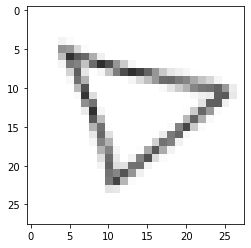

In [79]:
plt.imshow(image_tensor[0])

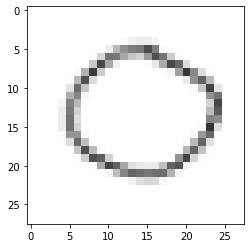

In [80]:
#Choose a 2nd random image from test_set (circles class)
test_samples_circles = os.listdir(os.path.join(TEST_DIR,'circles'))
img_path2= os.path.join(TEST_DIR,'circles',test_samples_circles[4])
image_gen_two= image.load_img(img_path2)

#visualization

image_tensor_2= image.img_to_array(image_gen_two)
image_tensor_2= np.expand_dims(image_tensor_2,axis=0)
image_tensor_2= image_tensor_2/255
plt.imshow(image_tensor_2[0]);

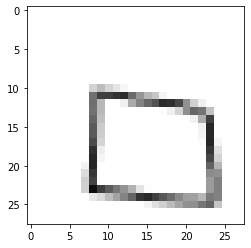

In [81]:
#Choose a 3rd random image from test_set (squares class)
test_samples_squares = os.listdir(os.path.join(TEST_DIR,'squares'))
img_path3= os.path.join(TEST_DIR,'squares',test_samples_squares[3])
image_gen_three= image.load_img(img_path3)

#visualization
image_tensor_3= image.img_to_array(image_gen_three)
image_tensor_3= np.expand_dims(image_tensor_3, axis=0)
image_tensor_3 = image_tensor_3/255
plt.imshow(image_tensor_3[0]); #plt.imshow (accepts 3 dimensions (28,28,3))

In [83]:
#Prediction

x1= image.img_to_array(image_gen)
x1= np.expand_dims(x1, axis=0)
x1= x1/.255

x2= image.img_to_array(image_gen_two)
x2= np.expand_dims(x2,axis=0)
x2=x2/.255

x3= image.img_to_array(image_gen_three)
x3 = np.expand_dims(x3,axis=0)
x3= x3/255

images= np.vstack([x1,x2,x3])
classes= np.argmax(model.predict(images, batch_size=10),axis=1)

In [93]:
print("the predictions for the random : triangle(class 2),\
circle(class 0) and square(class 1) from test_set are: \n {} ".format(classes))

the predictions for the random : triangle(class 2),circle(class 0) and square(class 1) from test_set are: 
 [2 0 1] 


## **Step_5: Visualizing intermediate activations: Convolutional layers**

In [94]:
from keras.models import Model

#extract the outputs of the 5 top layers (before Flatten)
layers_outputs= [layer.output for layer in model.layers[:5]]

#create a model that retuns these outputs, given the input of the model
activation_model= Model(inputs= model.input, outputs= layers_outputs)

In [100]:
#we will use the three random images (that we already used for predictions): see step4
#to extract the intermediate activations
activations_predicted= activation_model.predict(image_tensor)

In [101]:
#extract the first layer (Recall: Conv2D,using 32 filters, padding= "valid", input_size=-28,28,3)
activation_first_layer=activations_predicted[0]
#we notice that, effectively, because of the defaultpadding "valid", the size becomes (26,26),
#and 32 channels (filters)
print(activation_first_layer.shape)

(1, 26, 26, 32)


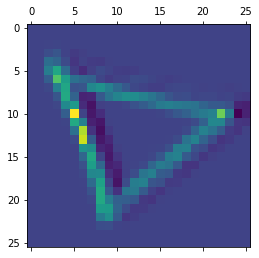

In [102]:
#we will visualize for example the 5th channel "after applying the learned 5th filter" on the 
#input image

plt.matshow(activation_first_layer[0,:,:,5]);

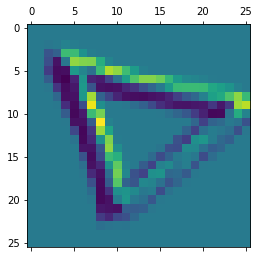

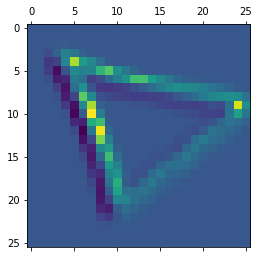

In [103]:
#we will visualize 2 channels of the 1st activation
for i in range (7,9):
    plt.matshow(activation_first_layer[0,:,:,i])

In [114]:
#visualization of each channel in each intermediate activation (of the 5 top layers)
layer_names= []

for layer in model.layers[:3]:
    layer_names.append(layer.name)
print(layer_names)

['conv2d_13', 'max_pooling2d_13', 'conv2d_14']


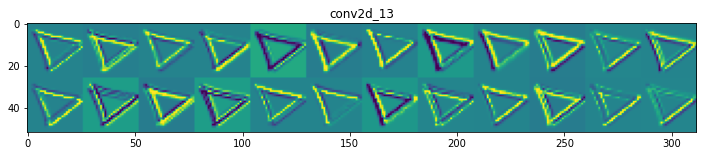

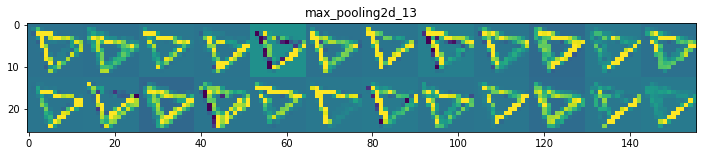

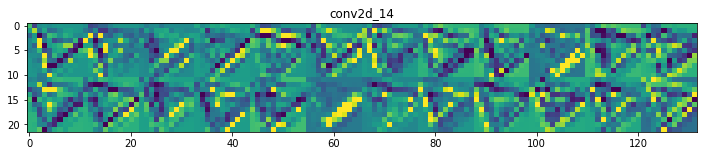

In [116]:
images_per_row = 12

for layer_name, layer_activation in zip(layer_names, activations_predicted): 
    n_features = layer_activation.shape[3] 
    size = layer_activation.shape[1] 
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() 
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, 
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')